<a href="https://colab.research.google.com/github/MuhammetCanGumussu/DL_Exercises/blob/main/CIFAR10_project_1_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##NOTLAR

Oluşturulan modelin düzgün çalıştığından emin olmak için eğitimden önce 1 veri veya random bir veri üzerinde çalıştır



In [ ]:
import torch
import torchvision
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
transform = torchvision.transforms.ToTensor()
target_transform = torchvision.transforms.Lambda( lambda y: torch.zeros(10, dtype= torch.float).scatter_(0, torch.tensor(y),value= 1) )

In [ ]:
train_dataset= torchvision.datasets.CIFAR10(
    root= "./CIFAR10",
    train= True,
    download= True,
    transform= torchvision.transforms.ToTensor(),
    target_transform= torchvision.transforms.Lambda(
                                    lambda y: torch.zeros(10, dtype= torch.float).scatter_(0, torch.tensor(y),value= 1)))

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./CIFAR10/cifar-10-python.tar.gz to ./CIFAR10


In [ ]:
test_dataset= torchvision.datasets.CIFAR10(
    root="./CIFAR10",
    train= False,
    download= True,
    transform= torchvision.transforms.ToTensor(),
    target_transform= torchvision.transforms.Lambda(
                                    lambda y: torch.zeros(10, dtype= torch.float).scatter_(0, torch.tensor(y),value= 1)))

Files already downloaded and verified


In [ ]:
train_dataloader= torch.utils.data.DataLoader(train_dataset, batch_size= 64, shuffle= True)
test_dataloader= torch.utils.data.DataLoader(test_dataset, batch_size= 64, shuffle= True)

In [ ]:
img_train, label_train= next(iter(train_dataloader))

print(f"train image shape: {img_train.shape}")
print(f"train label shape: {label_train.shape}")
print(f"dtype of img_train: {img_train.dtype}")
print(f"dtype of label_train: {label_train.dtype}")  

train image shape: torch.Size([64, 3, 32, 32])
train label shape: torch.Size([64, 10])
dtype of img_train: torch.float32
dtype of label_train: torch.float32


In [ ]:
print(f"number of samples in train_dataset: {len(train_dataset)}")
print("-----------------------------------")
print(f"minibatch size: {train_dataloader.batch_size}")
print(f"number of minibatch for completing 1 epoc: {len(train_dataloader)}")

number of samples in train_dataset: 50000
-----------------------------------
minibatch size: 64
number of minibatch for completing 1 epoc: 782


In [ ]:
img_test, label_test= next(iter(test_dataloader))

print(f"test image shape: {img_test.shape}")
print(f"test label shape: {label_test.shape}")
print(f"dtype of img_train: {img_test.dtype}")
print(f"dtype of label_train: {label_test.dtype}")  

test image shape: torch.Size([64, 3, 32, 32])
test label shape: torch.Size([64, 10])
dtype of img_train: torch.float32
dtype of label_train: torch.float32


In [ ]:
print(f"number of samples in test_dataset: {len(test_dataset)}")
print("-----------------------------------")
print(f"minibatch size: {test_dataloader.batch_size}")
print(f"number of minibatch for completing 1 epoc: {len(test_dataloader)}")

number of samples in test_dataset: 10000
-----------------------------------
minibatch size: 64
number of minibatch for completing 1 epoc: 157


In [ ]:
labels_map= {
    0:"airplane",
    1:"automobile",
    2:"bird",
    3:"cat",
    4:"deer",
    5:"dog",
    6:"frog",
    7:"horse",
    8:"ship",
    9:"truck"
}

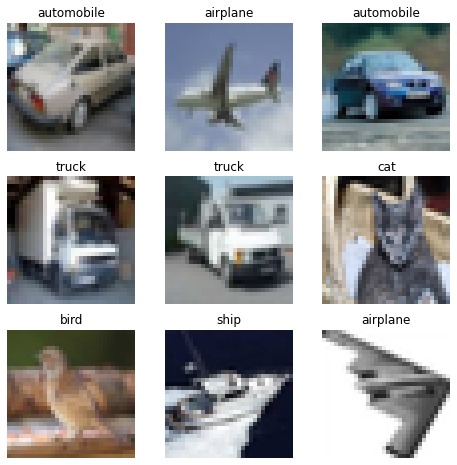

In [ ]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[torch.argmax(label,dim= 0).item()])
    plt.axis("off")
    transform= torchvision.transforms.ToPILImage()
    img= transform(img)
    plt.imshow(img)
plt.show()

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


In [ ]:
#if layers were written inside as sequential, this would be more readable

class PlainNeuralNetwork (torch.nn.Module):
  def __init__(self):
    super(PlainNeuralNetwork,self).__init__()
    
    self.flatten= torch.nn.Flatten()
    self.linear_0= torch.nn.Linear(32*32*3,512)
    self.relu_0= torch.nn.ReLU()
    self.linear_1= torch.nn.Linear(512, 256)
    self.relu_1= torch.nn.ReLU()
    self.linear_2= torch.nn.Linear(256, 128)
    self.relu_2= torch.nn.ReLU()
    self.linear_3= torch.nn.Linear(128, 64)
    self.relu_3= torch.nn.ReLU()
    self.linear_4= torch.nn.Linear(64, 32)
    self.relu_4= torch.nn.ReLU()
    self.linear_5= torch.nn.Linear(32,10)
  
  def forward(self,x):
    x= self.flatten(x)
    x= self.linear_0(x)
    x= self.relu_0(x)
    x= self.linear_1(x)
    x= self.relu_1(x)
    x= self.linear_2(x)
    x= self.relu_2(x)
    x= self.linear_3(x)
    x= self.relu_3(x)
    x= self.linear_4(x)
    x= self.relu_4(x)
    logits= self.linear_5(x)
    return logits



In [ ]:
model= PlainNeuralNetwork()

In [ ]:
num_params = sum(param.numel() for param in model.parameters())  #numel : number of elements
print(f"number of model parameters: {num_params:,}") #formatlamaya dikkat et, baya kullanışlı

number of model parameters: 1,748,266


In [ ]:
print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
  print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure: PlainNeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_0): Linear(in_features=3072, out_features=512, bias=True)
  (relu_0): ReLU()
  (linear_1): Linear(in_features=512, out_features=256, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=256, out_features=128, bias=True)
  (relu_2): ReLU()
  (linear_3): Linear(in_features=128, out_features=64, bias=True)
  (relu_3): ReLU()
  (linear_4): Linear(in_features=64, out_features=32, bias=True)
  (relu_4): ReLU()
  (linear_5): Linear(in_features=32, out_features=10, bias=True)
)


Layer: linear_0.weight | Size: torch.Size([512, 3072]) | Values : tensor([[-0.0085, -0.0158,  0.0055,  ..., -0.0099, -0.0062,  0.0104],
        [-0.0093,  0.0102,  0.0097,  ..., -0.0160,  0.0111, -0.0162]],
       grad_fn=<SliceBackward0>) 

Layer: linear_0.bias | Size: torch.Size([512]) | Values : tensor([-0.0134,  0.0074], grad_fn=<SliceBackward0>) 

Layer: linear_1.weight | Size: torch.Size([256, 512]) | Values : 

In [ ]:
learning_rate= 1e-3
momentum= 0.9
epochs=20

In [ ]:
#next(iter(model.parameters()))  #gives us parameter matrix of first layer 

In [ ]:
loss_fn= torch.nn.CrossEntropyLoss()
optimizer= torch.optim.SGD(params= model.parameters(), lr= learning_rate, momentum= momentum)

In [ ]:
X,y= next(iter(test_dataloader))
y.shape
y.argmax(1)

tensor([1, 5, 4, 9, 0, 3, 6, 3, 0, 3, 6, 2, 1, 6, 8, 7, 8, 6, 4, 6, 8, 2, 7, 4,
        0, 5, 2, 9, 7, 5, 4, 7, 7, 5, 7, 2, 6, 7, 9, 9, 0, 4, 6, 5, 2, 1, 9, 2,
        4, 0, 0, 4, 2, 3, 6, 9, 9, 8, 5, 7, 9, 7, 3, 7])

In [ ]:
pred=model(X)
pred.argmax(1)

tensor([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [ ]:
def trainLoop(train_dataloader, loss_fn, model, optimizer):
  
  size= len(train_dataloader.dataset)
  
  for batch, (X,y) in enumerate(train_dataloader):
    
    pred= model(X)
    loss= loss_fn(pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 100 == 0:
      loss, current= loss.item(), batch * len(X)
      print(f"loss: {loss:>2f}  [{current:>5d}/{size:>5d}]")


def testLoop(test_dataloader, loss_fn, model):

    size = len(test_dataloader.dataset)
    num_batches = len(test_dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in test_dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y.argmax(1)).type(torch.float).sum().item()  #do not forget!, our prediction has batch dim

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")



In [ ]:
for t in range(epochs):
    print(f"Epoch {t+1}\n\n-------------------------------")
    trainLoop(train_dataloader, loss_fn, model, optimizer)
    testLoop(test_dataloader,loss_fn, model)
print("Done!")

Epoch 1

-------------------------------
loss: 2.330146  [    0/50000]
loss: 2.317857  [ 6400/50000]
loss: 2.305564  [12800/50000]
loss: 2.301467  [19200/50000]
loss: 2.318914  [25600/50000]
loss: 2.301960  [32000/50000]
loss: 2.301231  [38400/50000]
loss: 2.305448  [44800/50000]
Test Error: 
 Accuracy: 10.9%, Avg loss: 2.299028 

Epoch 2

-------------------------------
loss: 2.301977  [    0/50000]
loss: 2.299908  [ 6400/50000]
loss: 2.297113  [12800/50000]
loss: 2.295216  [19200/50000]
loss: 2.302999  [25600/50000]
loss: 2.295479  [32000/50000]
loss: 2.283506  [38400/50000]
loss: 2.287849  [44800/50000]
Test Error: 
 Accuracy: 15.3%, Avg loss: 2.284126 

Epoch 3

-------------------------------
loss: 2.287045  [    0/50000]
loss: 2.280183  [ 6400/50000]
loss: 2.268280  [12800/50000]
loss: 2.267710  [19200/50000]
loss: 2.216352  [25600/50000]
loss: 2.204858  [32000/50000]
loss: 2.250725  [38400/50000]
loss: 2.155344  [44800/50000]
Test Error: 
 Accuracy: 17.1%, Avg loss: 2.106087 

E

In [ ]:
#2nd epoch (20 epoch eğitilen model ile devam)
#lr küçültülebilirdi
epochs_2=20
for t in range(epochs_2):
    print(f"Epoch {t+1}\n\n-------------------------------")
    trainLoop(train_dataloader, loss_fn, model, optimizer)
    testLoop(test_dataloader,loss_fn, model)
print("Done!")

Epoch 1

-------------------------------
loss: 1.317287  [    0/50000]
loss: 1.561680  [ 6400/50000]
loss: 1.364206  [12800/50000]
loss: 1.264673  [19200/50000]
loss: 1.362093  [25600/50000]
loss: 1.523495  [32000/50000]
loss: 1.632414  [38400/50000]
loss: 1.644129  [44800/50000]
Test Error: 
 Accuracy: 46.1%, Avg loss: 1.495110 

Epoch 2

-------------------------------
loss: 1.437151  [    0/50000]
loss: 1.784070  [ 6400/50000]
loss: 1.272101  [12800/50000]
loss: 1.346640  [19200/50000]
loss: 1.536019  [25600/50000]
loss: 1.494601  [32000/50000]
loss: 1.437601  [38400/50000]
loss: 1.383750  [44800/50000]
Test Error: 
 Accuracy: 46.1%, Avg loss: 1.488068 

Epoch 3

-------------------------------
loss: 1.365330  [    0/50000]
loss: 1.509377  [ 6400/50000]
loss: 1.543646  [12800/50000]
loss: 1.232648  [19200/50000]
loss: 1.371740  [25600/50000]
loss: 1.329811  [32000/50000]
loss: 1.339659  [38400/50000]
loss: 1.428676  [44800/50000]
Test Error: 
 Accuracy: 48.2%, Avg loss: 1.433794 

E

In [ ]:

for g in optimizer.param_groups:
    g['lr'] = 0.01

In [ ]:
#2nd epoch (20 epoch eğitilen model ile devam)
#lr küçültüldü

epochs_3=30
for t in range(epochs_3):
    print(f"Epoch {t+1}\n\n-------------------------------")
    trainLoop(train_dataloader, loss_fn, model, optimizer)
    testLoop(test_dataloader,loss_fn, model)
print("Done!")

In [ ]:

epochs_3=15
for t in range(epochs_3):
    print(f"Epoch {t+1}\n\n-------------------------------")
    trainLoop(train_dataloader, loss_fn, model, optimizer)
    testLoop(test_dataloader,loss_fn, model)
print("Done!")

Epoch 1

-------------------------------
loss: 0.514156  [    0/50000]
loss: 0.415063  [ 6400/50000]
loss: 0.617169  [12800/50000]
loss: 0.632262  [19200/50000]
loss: 0.821093  [25600/50000]
loss: 0.702885  [32000/50000]
loss: 0.727054  [38400/50000]
loss: 0.839220  [44800/50000]
Test Error: 
 Accuracy: 51.7%, Avg loss: 1.625218 

Epoch 2

-------------------------------
loss: 0.568440  [    0/50000]
loss: 0.522891  [ 6400/50000]
loss: 0.484212  [12800/50000]
loss: 0.592688  [19200/50000]
loss: 0.656333  [25600/50000]
loss: 0.744885  [32000/50000]
loss: 0.686439  [38400/50000]
loss: 0.838469  [44800/50000]
Test Error: 
 Accuracy: 53.6%, Avg loss: 1.631818 

Epoch 3

-------------------------------
loss: 0.555198  [    0/50000]
loss: 0.705684  [ 6400/50000]
loss: 0.529464  [12800/50000]
loss: 0.665837  [19200/50000]
loss: 0.683541  [25600/50000]
loss: 0.622385  [32000/50000]
loss: 0.647114  [38400/50000]
loss: 0.712586  [44800/50000]
Test Error: 
 Accuracy: 53.3%, Avg loss: 1.694302 

E

In [ ]:
#eğitilen modeli görseller ile dene
#kaç tane parametre var bastır
#cnn mimarisi ile de çalış

In [ ]:
image, label =next(iter(test_dataloader))
image[0].shape
den=torch.unsqueeze(image[0],dim=0)
den.shape
pred=model(den)
print(pred)
torch.argmax(pred,dim= 1).item()

tensor([[  5.8705,  19.9694,  -0.4534,  -6.4833,  -2.2111, -13.8285,  -7.9357,
          -8.3047,  10.1686,   5.9741]], grad_fn=<AddmmBackward0>)


1

torch.Size([10])
torch.Size([3, 32, 32])
torch.Size([10])
torch.Size([3, 32, 32])
torch.Size([10])
torch.Size([3, 32, 32])
torch.Size([10])
torch.Size([3, 32, 32])
torch.Size([10])
torch.Size([3, 32, 32])
torch.Size([10])
torch.Size([3, 32, 32])
torch.Size([10])
torch.Size([3, 32, 32])
torch.Size([10])
torch.Size([3, 32, 32])
torch.Size([10])
torch.Size([3, 32, 32])


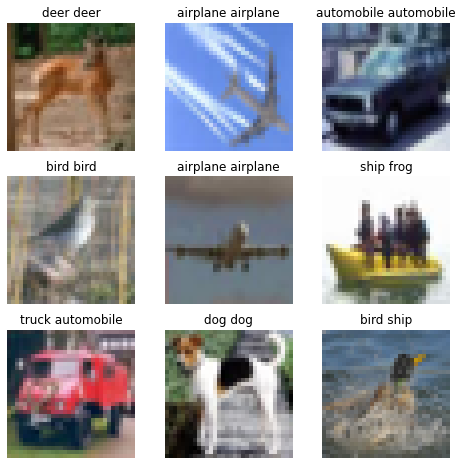

In [ ]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx= torch.randint(64, size=(1,)).item()
    img, label= next(iter(test_dataloader))
    img= torch.unsqueeze(img[sample_idx],dim=0)
    label= label[sample_idx]
    print(label.shape)
    figure.add_subplot(rows, cols, i)
    #plt.title( str("label: ")+labels_map[torch.argmax(label, dim= 0).item()]+str(" prediction: ")+str(labels_map[torch.argmax(model(img), dim= 1).item()]))
    plt.title( labels_map[torch.argmax(label, dim= 0).item()]+str(" ")+str(labels_map[torch.argmax(model(img), dim= 1).item()]))
    plt.axis("off")
    transform= torchvision.transforms.ToPILImage()
    img=torch.squeeze(img,dim=0)
    print(img.shape)
    img= transform(img)
    plt.imshow(img)
plt.show()